# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
print(eKonf.__version__)
data_dir = "../data/fomc"

0.1.32+6.ged4b0a1.dirty


## Load a feature set

In [2]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_small = eKonf.instantiate(fs_cfg)

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [test]


## Auto ML

In [3]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 600
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

/resources/.pyenv/versions/3.8.12/envs/ekonml38/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
INFO:ekorpkit.ekonf:No method defined to call


In [9]:
eKonf.print(model_cfg)

{'_method_': None,
 '_target_': 'ekorpkit.models.automl.flaml.AutoML',
 'config': {'log_file_name': 'automl_fomc_features_small.log',
            'metric': 'accuracy',
            'seed': 7654321,
            'task': 'classification',
            'time_budget': 600,
            'verbose': False},
 'dataset': {'_target_': 'ekorpkit.datasets.feature.FeatureSet',
             'auto': {'build': False, 'load': True},
             'column_info': {'_target_': 'ekorpkit.info.feature.FeatureInfo',
                             'columns': {'id': None,
                                         'index': None,
                                         'x': None,
                                         'y': None},
                             'data': None,
                             'datetime': {'_parms_': None,
                                          'columns': None,
                                          'format': None},
                             'keys': {'id': 'id',
                      

In [5]:
model.fit()

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [test]


Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 7, 'max_features': 0.15085968785222795, 'max_leaves': 10, 'criterion': 'gini'}
Best accuracy on validation data: 0.6807
Training duration of best run: 0.1351 s


In [6]:
model.best_estimator

RandomForestClassifier(max_features=0.15085968785222795, max_leaf_nodes=10,
                       n_estimators=7, n_jobs=-1)

In [7]:
model.save()

INFO:ekorpkit.models.automl.flaml:Saved model to /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [6]:
model.load()

INFO:ekorpkit.models.automl.flaml:Loaded model from /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [5]:
model.show_results()

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 7, 'max_features': 0.15085968785222795, 'max_leaves': 10, 'criterion': 'gini'}
Best accuracy on validation data: 0.6807
Training duration of best run: 0.1351 s


In [4]:
model.get_logs()

INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'importances', 'y': 'columns', 'hue': None}
INFO:ekorpkit.visualize.base:Saved figure to ./figs/plot_BarPlot.png


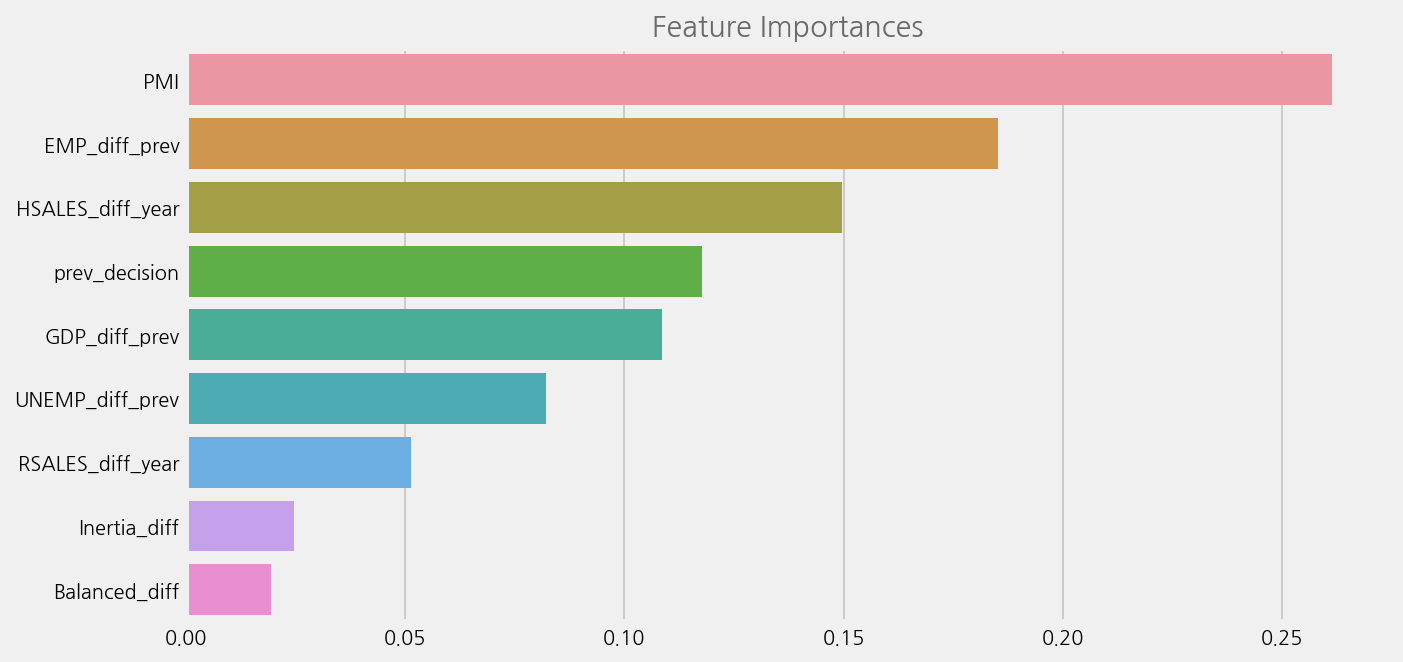

In [8]:
model.plot_feature_importance()